In [1]:
#load packages
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import soundfile as sf


In [2]:
#import data 
path = 'x:/Steering/Recordings/Processed/'
data, fs = sf.read(path + 'ERB=1.wav')
classes = pd.read_csv(path + 'Classes_1.csv')

In [3]:
X = data[:len(data)-1,:data.shape[1]] #775361
Y = classes.values[:,0]

In [4]:
#split into training and test set
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=classes)

In [5]:
#do one-hot encoding
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

enc = OneHotEncoder(sparse=False)

In [6]:
integer_encoded_train = trainY.reshape(len(trainY), 1)
onehot_encoded_train = enc.fit_transform(integer_encoded_train)

integer_encoded_test = testY.reshape(len(testY), 1)
onehot_encoded_test = enc.fit_transform(integer_encoded_test)

In [7]:
onehot_encoded_train 


array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [8]:
#DC removal 
trainX -= (np.mean(trainX, axis=0) + 1e-8)
testX -= (np.mean(testX, axis=0) + 1e-8)

In [9]:
trainX.shape

(848016, 216)

In [10]:
clf = keras.Sequential()
opt = keras.optimizers.Adam(lr=0.05)

In [11]:
onehot_encoded_train.shape[1], X.shape[1],onehot_encoded_train

(5, 216, array([[0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]]))

In [12]:

clf.add(keras.layers.Dense(
  units = 110,
  input_dim = trainX.shape[1],   
  activation = 'tanh'
))

clf.add(keras.layers.Dropout(0.2))

clf.add(keras.layers.Dense(
    units = onehot_encoded_train.shape[1],    
    input_dim = 110,
    activation = 'softmax'
))


In [13]:
onehot_encoded_train.shape[1]

5

In [14]:
clf.compile(loss='mean_squared_error',
    optimizer=opt,
           metrics=['categorical_accuracy'])

In [15]:
history = clf.fit(trainX,onehot_encoded_train,
                 batch_size = 100, epochs = 20,
                 verbose = 1,
                 validation_split = 0.2)

Train on 678412 samples, validate on 169604 samples
Epoch 1/20
678412/678412 [==============================] - 26s 38us/step - loss: 0.1380 - categorical_accuracy: 0.4502 - val_loss: 0.1273 - val_categorical_accuracy: 0.5012
Epoch 2/20
678412/678412 [==============================] - 26s 39us/step - loss: 0.1264 - categorical_accuracy: 0.5161 - val_loss: 0.1085 - val_categorical_accuracy: 0.6079
Epoch 3/20
678412/678412 [==============================] - 29s 42us/step - loss: 0.1187 - categorical_accuracy: 0.5568 - val_loss: 0.1034 - val_categorical_accuracy: 0.6298
Epoch 4/20
678412/678412 [==============================] - 27s 40us/step - loss: 0.1137 - categorical_accuracy: 0.5796 - val_loss: 0.1081 - val_categorical_accuracy: 0.6004
Epoch 5/20
678412/678412 [==============================] - 26s 39us/step - loss: 0.1088 - categorical_accuracy: 0.6041 - val_loss: 0.0873 - val_categorical_accuracy: 0.7029
Epoch 6/20
678412/678412 [==============================] - 28s 41us/step - lo

In [16]:
data.shape[1]    

216

In [17]:
clf.predict_classes(testX[:100,:]) + 1,testY[:100]

(array([2, 5, 2, 5, 3, 3, 3, 2, 2, 2, 1, 5, 1, 5, 2, 3, 4, 2, 2, 2, 4, 5,
        3, 5, 2, 4, 5, 4, 1, 5, 2, 5, 3, 2, 1, 1, 2, 2, 2, 2, 2, 4, 2, 2,
        4, 2, 5, 5, 1, 5, 5, 1, 5, 1, 1, 3, 2, 4, 2, 2, 1, 3, 1, 4, 4, 4,
        2, 3, 2, 2, 1, 2, 2, 2, 2, 1, 3, 5, 1, 5, 2, 2, 1, 2, 4, 3, 2, 5,
        2, 5, 5, 2, 4, 4, 2, 2, 5, 5, 5, 4], dtype=int64),
 array([4, 4, 4, 5, 3, 3, 3, 2, 2, 2, 5, 5, 1, 5, 2, 3, 4, 2, 4, 2, 4, 5,
        3, 5, 2, 4, 1, 1, 3, 5, 2, 5, 3, 2, 1, 1, 2, 2, 2, 2, 4, 4, 2, 2,
        3, 4, 4, 4, 1, 3, 4, 1, 5, 1, 4, 3, 2, 4, 2, 2, 1, 3, 5, 4, 4, 5,
        2, 3, 2, 2, 1, 2, 4, 2, 2, 1, 3, 5, 1, 5, 4, 2, 1, 4, 4, 3, 2, 5,
        2, 5, 4, 2, 4, 4, 4, 2, 5, 5, 4, 1], dtype=int64))

In [18]:
# saving the model 
# save model and weights
#clf_json = clf.to_json()
#with open("NN_216-110-5.json", "w") as json_file:
 #   json_file.write(clf_json)
    
#clf.save_weights("NN_216-110-5_weights.h5")

In [19]:
#np.save('TestX_NN_216-110-5',testX), np.save('TestY_NN_216-110-5',testY),
#np.save('OneHot_testY_216-110-5',onehot_encoded_test)

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_categorical_accuracy'])
plt.plot(history.history['categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.axis([0, 20, 0.5, 1])
plt.legend(['Validation', 'Training'], loc='upper left')
plt.savefig('Accuracy_ERB=1.png',dpi=100)

In [21]:
#saving weights
weights_first_layer = clf.layers[0].get_weights()[0]
biases_first_layer = clf.layers[0].get_weights()[1]

weights_second_layer = clf.layers[2].get_weights()[0]
biases_second_layer = clf.layers[2].get_weights()[1]


weights_first_layer = np.vstack([biases_first_layer, weights_first_layer])
weights_second_layer = np.vstack([biases_second_layer, weights_second_layer])


weights_first_layer_norm = weights_first_layer / abs(weights_first_layer).max()
#biases_first_layer_norm = biases_first_layer / abs(biases_first_layer).max()

weights_second_layer_norm = weights_second_layer / abs(weights_second_layer).max()
#biases_second_layer_norm = biases_second_layer / abs(biases_second_layer).max()


weights_first_layer_norm.shape, weights_second_layer_norm.shape

abs(weights_first_layer).max(), abs(weights_second_layer).max()

np.savetxt('weights_first_layer_norm_NN_216-110-5.txt',weights_first_layer_norm,delimiter= ',')
np.savetxt('weights_second_layer_norm_NN_216-110-5.txt',weights_second_layer_norm,delimiter= ',')


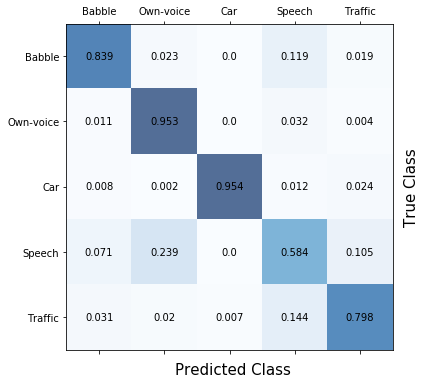

In [22]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cfm = confusion_matrix(testY,clf.predict_classes(testX)) 

a = [0 for x in range(5)]
cfm_norm = np.zeros((5,5))#[[0 for x in range(5)] for y in range(5)]

for idx in range(5):
    cfm_norm[idx,:] = cfm[idx+1,:-1] / sum(cfm[idx+1,:-1]) #len(testY[testY == idx + 1])      

cfm_norm = np.around(cfm_norm,decimals=3)

#nicer confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cfm_norm,cmap=plt.cm.Blues,alpha=0.7)

for i in range(cfm_norm.shape[0]):
    for j in range(cfm_norm.shape[1]):
        ax.text(x=j,y=i, s=cfm_norm[i,j],va='center', ha= 'center')

ax.set_xticks([0,1,2,3,4])
ax.set_yticks([0,1,2,3,4])
ax.set_xticklabels(['Babble','Own-voice','Car','Speech','Traffic'])
ax.set_yticklabels(['Babble','Own-voice','Car','Speech','Traffic'])
ax.yaxis.set_label_coords(1.08,0.5)
ax.xaxis.set_label_coords(0.51,-0.04)
ax.set_xlabel('Predicted Class',fontsize=15)
ax.set_ylabel('True Class',fontsize=15)
fig.savefig('Conf_Matrix_ERB=1.png',dpi=100)


In [23]:
FP = cfm_norm.sum(axis=0) - np.diag(cfm_norm)  
FN = cfm_norm.sum(axis=1) - np.diag(cfm_norm)
TP = np.diag(cfm_norm)
TN = cfm_norm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

ACC.mean(),TPR.mean(), FPR.mean()

(0.9303060612122425, 0.8257169169169168, 0.04355705176294076)